In [2]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Only one state

In [28]:
train = pd.read_csv('data/train_df.csv')
test = pd.read_csv('data/test_df.csv')


print(train.subregion1_code.unique())
sample_state = 'UT'
test = test[test.subregion1_code == sample_state]
train = train[train.subregion1_code == sample_state]

['AK' 'LA' 'IL' 'DE' 'MD' 'MN' 'ID' 'NH' 'KS' 'ME' 'GA' 'VA' 'MA' 'WA'
 'WI' 'TN' 'OH' 'OR' 'IN' 'IA' 'MT' 'CO' 'OK' 'NM' 'CA' 'AL' 'MO' 'WY'
 'NC' 'NV' 'TX' 'FL' 'SD' 'NY' 'KY' 'MS' 'VT' 'CT' 'HI' 'AZ' 'WV' 'UT'
 'RI' 'SC' 'AR' 'PA' 'NJ' 'ND' 'NE' 'MI']


In [56]:
train_X.columns

Index(['population_den', 'elder_perc', 'average_temperature_celsius',
       'mobility_retail_and_recreation', 'mobility_grocery_and_pharmacy',
       'mobility_parks', 'mobility_transit_stations', 'mobility_workplaces',
       'mobility_residential', 'school_closing', 'workplace_closing',
       'restrictions_on_gatherings', 'public_transport_closing',
       'stay_at_home_requirements', 'public_information_campaigns',
       'testing_policy', 'facial_coverings', 'vaccination_policy',
       'stringency_index', 'search_trends_anxiety', 'search_trends_apnea',
       'search_trends_asthma', 'search_trends_chest_pain',
       'search_trends_cough', 'search_trends_fatigue',
       'search_trends_diarrhea', 'search_trends_headache',
       'search_trends_heart_arrhythmia', 'search_trends_fever',
       'search_trends_common_cold', 'search_trends_pain',
       'search_trends_nausea', 'search_trends_sore_throat',
       'search_trends_swelling', 'search_trends_vomiting'],
      dtype='object

In [29]:
train.subregion1_code.unique()

array(['UT'], dtype=object)

In [30]:
test_X = test.drop(['subregion1_code', 'date', 'cumulative_confirmed'], axis = 1)
test_y = test.new_confirmed
test_X = test_X.drop(['new_confirmed'], axis = 1)

train_X = train.drop(['subregion1_code', 'date', 'cumulative_confirmed'], axis = 1)
train_y = train.new_confirmed
train_X = train_X.drop(['new_confirmed'], axis = 1)

In [32]:
model = GradientBoostingRegressor()
model.fit(train_X, train_y)

GradientBoostingRegressor()

In [35]:
model.get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [72]:
pred_y = model.predict(test_X)

In [73]:
print('Root Mean Squared Error (RMSE):', np.sqrt(np.sum((test_y - pred_y)**2)/len(pred_y)))

mape = np.mean(np.abs((test_y - pred_y) / np.abs(test_y)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

Root Mean Squared Error (RMSE): 1684.2814357254936
Mean Absolute Percentage Error (MAPE): 915.49
Accuracy: -815.49


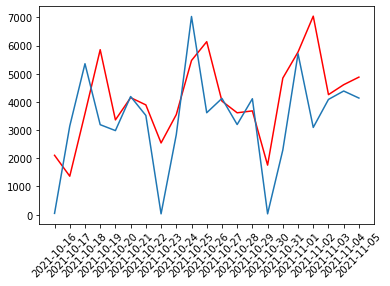

In [74]:
# check model performance
plt.plot(test["date"], pred_y, c = 'red')
plt.plot(test["date"], test_y)
plt.xticks(rotation = 45)
pass

## Hyperparameter Tuning: Gaojia, RUN THIS !!

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [31]:
train = pd.read_csv('data/train_df.csv')
test = pd.read_csv('data/test_df.csv')



In [32]:
test_X = test.drop(['subregion1_code', 'date', 'cumulative_confirmed'], axis = 1)
test_y = test.new_confirmed
test_X = test_X.drop(['new_confirmed'], axis = 1)

train_X = train.drop(['subregion1_code', 'date', 'cumulative_confirmed'], axis = 1)
train_y = train.new_confirmed
train_X = train_X.drop(['new_confirmed'], axis = 1)

In [34]:
test_X.dtypes

population_den                    float64
elder_perc                        float64
average_temperature_celsius       float64
mobility_retail_and_recreation    float64
mobility_grocery_and_pharmacy     float64
mobility_parks                    float64
mobility_transit_stations         float64
mobility_workplaces               float64
mobility_residential              float64
school_closing                    float64
workplace_closing                 float64
restrictions_on_gatherings        float64
public_transport_closing          float64
stay_at_home_requirements         float64
public_information_campaigns      float64
testing_policy                    float64
facial_coverings                  float64
vaccination_policy                float64
stringency_index                  float64
search_trends_anxiety             float64
search_trends_apnea               float64
search_trends_asthma              float64
search_trends_chest_pain          float64
search_trends_cough               

In [21]:
initial = GradientBoostingRegressor(learning_rate = 0.02)
initial.fit(train_X, train_y)

GradientBoostingRegressor(learning_rate=0.02)

In [36]:
joblib.dump(initial, "data/GBM_untuned.joblib")

['data/GBM_untuned.joblib']

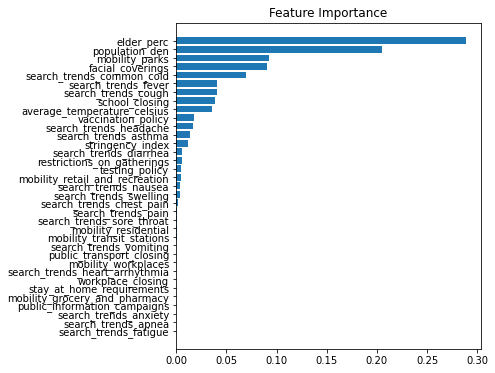

In [22]:
feature_importance = initial.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(train_X.columns)[sorted_idx])
plt.title("Feature Importance")
plt.savefig('data/GBM_importance.jpeg');

In [23]:
GBM_importances = pd.Series(initial.feature_importances_, index = train_X.columns)
indices = np.argsort(GBM_importances)[::-1]

In [19]:
GBM_importances[indices]

NameError: name 'GBM_importances' is not defined

In [24]:
no_list = pd.DataFrame(GBM_importances[GBM_importances<0.002]).index.tolist()
len(no_list)

15

In [25]:
train = pd.read_csv('data/train_df.csv')
test = pd.read_csv('data/test_df.csv')

test_X = test.drop(['subregion1_code', 'date', 'cumulative_confirmed'], axis = 1)
test_y = test.new_confirmed
test_X = test_X.drop(['new_confirmed'], axis = 1)

train_X = train.drop(['subregion1_code', 'date', 'cumulative_confirmed'], axis = 1)
train_y = train.new_confirmed
train_X = train_X.drop(['new_confirmed'], axis = 1)

In [26]:
train_X_new = train_X.drop(no_list, axis = 1)
test_X_new = test_X.drop(no_list, axis = 1)

In [108]:
paras = {'max_depth':[3,4,5,6],
         'alpha':[0.5,0.7,0.9],
         'max_leaf_nodes': [5, 10, 15],
         'min_samples_leaf': [5, 10, 15],
         'n_estimators': [int(x) for x in range(5, 30, 5)], 
         'max_features' : ['auto']}

In [109]:
gbm.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.02,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [110]:
train_X_new

,population_den,elder_perc,average_temperature_celsius,mobility_retail_and_recreation,mobility_parks,school_closing,restrictions_on_gatherings,testing_policy,facial_coverings,vaccination_policy,stringency_index,search_trends_asthma,search_trends_chest_pain,search_trends_cough,search_trends_diarrhea,search_trends_headache,search_trends_fever,search_trends_common_cold,search_trends_nausea,search_trends_swelling
0,0.520966,0.175013,-7.188966,8.333333,4.000000,0.0,0.0,1.0,0.0,0.0,19.44,3.032500,1.565000,10.080000,4.898000,4.730000,5.481667,35.548571,2.777500,5.736000
1,33.950321,0.219261,19.259330,14.648148,13.333333,0.0,0.0,0.0,0.0,0.0,8.33,2.508500,1.390000,8.666364,3.856667,4.193333,4.816250,23.835111,2.141579,5.451429
2,87.830658,0.220015,8.498987,11.086420,21.187500,0.0,0.0,1.0,0.0,0.0,13.89,2.513750,1.547727,9.069400,4.597500,4.369130,5.769412,26.026301,2.330000,5.495472
3,147.511978,0.263328,7.361806,9.750000,31.000000,0.0,0.0,1.0,0.0,0.0,19.44,2.412500,1.235000,8.672500,4.010000,3.925000,4.705000,24.257500,1.787500,5.157500
4,199.137884,0.220946,7.670613,6.440000,29.923077,0.0,0.0,0.0,0.0,0.0,13.89,2.718000,1.526471,9.601304,4.345652,4.455909,5.440870,26.975600,2.112778,5.170435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28457,2.736775,0.262886,4.429462,8.090909,38.000000,2.0,0.0,3.0,2.0,5.0,39.81,2.380000,1.286000,6.137000,4.224444,3.960000,3.986667,12.030769,1.973333,4.979000
28458,40.091757,0.190824,21.250830,2.736000,3.340000,1.0,0.0,3.0,2.0,5.0,37.96,2.247797,1.386735,5.761368,4.013371,3.737191,3.530116,8.919385,2.102105,5.171771
28459,14.160532,0.283096,14.740813,15.062500,92.000000,1.0,0.0,3.0,2.0,5.0,28.70,1.152222,0.748333,2.897333,2.472667,2.127143,2.130000,5.089412,1.058750,2.946875
28460,7.786447,0.232630,4.641660,9.894737,66.600000,1.0,0.0,3.0,2.0,5.0,28.70,2.012500,1.471667,6.426923,4.134545,3.780000,4.468462,11.434348,2.166250,5.202667


In [112]:
gbm = GradientBoostingRegressor(learning_rate = 0.02)


random_search = RandomizedSearchCV(gbm, 
                                   param_distributions = paras, 
                                   n_iter = 100, 
                                   n_jobs = -1, 
                                   cv = 3, 
                                   verbose = 2, 
                                   random_state = 42 )

random_search.fit(train_X_new, train_y)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=GradientBoostingRegressor(learning_rate=0.02),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [0.5, 0.7, 0.9],
                                        'max_depth': [3, 4, 5, 6],
                                        'max_features': ['auto'],
                                        'max_leaf_nodes': [5, 10, 15],
                                        'min_samples_leaf': [5, 10, 15],
                                        'n_estimators': [5, 10, 15, 20, 25]},
                   random_state=42, verbose=2)

In [113]:
random_search.best_params_

{'n_estimators': 5,
 'min_samples_leaf': 15,
 'max_leaf_nodes': 15,
 'max_features': 'auto',
 'max_depth': 6,
 'alpha': 0.9}

In [15]:
gbm_fin = GradientBoostingRegressor(learning_rate = 0.02,
                                    n_estimators = 5,
                                    min_samples_leaf= 15,
                                    max_leaf_nodes= 15,
                                    max_features='auto',
                                    max_depth=6,
                                    alpha= 0.9)

gbm_fin.fit(train_X, train_y)

GradientBoostingRegressor(learning_rate=0.02, max_depth=6, max_features='auto',
                          max_leaf_nodes=15, min_samples_leaf=15,
                          n_estimators=5)

In [29]:
import joblib
# save model
joblib.dump(gbm_fin, "data/GBM_fin.joblib")

['data/GBM_fin.joblib']

In [35]:
test_X

,population_den,elder_perc,average_temperature_celsius,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,school_closing,...,search_trends_diarrhea,search_trends_headache,search_trends_heart_arrhythmia,search_trends_fever,search_trends_common_cold,search_trends_pain,search_trends_nausea,search_trends_sore_throat,search_trends_swelling,search_trends_vomiting
0,9.610421,0.223771,8.182931,4.705882,4.090909,94.250000,41.909091,-9.160000,-1.000000,1.0,...,4.035556,4.357000,1.877500,3.990909,12.613000,34.020000,1.944000,2.336000,5.204000,3.215000
1,2.736775,0.262886,9.258355,14.583333,20.000000,75.000000,19.555556,-10.266667,-0.111111,2.0,...,4.438889,4.431111,1.526667,4.755556,12.521667,35.241333,2.488571,2.364286,5.352000,3.345714
2,110.967191,0.257171,18.300148,3.065574,11.129630,99.954545,11.060606,-9.890625,0.867925,1.0,...,4.288070,4.175965,1.755897,4.043333,11.360469,35.295152,1.987500,2.240789,5.929167,2.764091
3,295.504547,0.117473,20.242593,5.166667,1.666667,268.000000,-22.250000,-10.333333,-1.000000,1.0,...,3.790000,4.436667,1.923333,3.700000,10.681667,35.676667,1.923333,2.761667,6.010000,3.003333
4,123.378689,0.290030,25.201150,-5.090909,2.264151,4.285714,-6.350000,-13.596774,1.250000,0.0,...,4.841739,4.424667,2.155250,3.696591,9.906071,39.408358,2.200000,2.213590,6.390400,3.011463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,74.724846,0.238824,6.000556,0.166667,3.460526,16.923077,-4.322581,-12.561224,3.363636,0.0,...,3.690845,3.752174,1.998478,3.678696,10.827791,32.640918,1.980652,2.307021,4.841892,2.601724
899,2.736775,0.262886,9.598181,5.363636,15.875000,31.800000,14.222222,-14.266667,3.100000,1.0,...,4.164444,4.117778,2.242857,3.985000,10.211538,33.197931,2.115714,2.197143,4.966000,2.574286
900,4.450429,0.236204,9.546932,6.833333,16.500000,40.250000,15.666667,-7.346154,2.090909,1.0,...,3.577500,3.640000,1.850000,3.534444,10.823125,29.425000,1.700000,1.990000,5.230000,2.567500
901,110.967191,0.257171,2.740024,0.016129,7.819672,30.636364,-0.600000,-16.212121,4.737705,1.0,...,3.893519,3.886271,2.086829,4.316167,13.107187,33.002576,1.747561,2.604103,5.249508,2.467209


In [28]:
gbm_fin.predict(test_X)

array([3077.26169355, 3077.26169355, 3287.78255833, 3287.78255833,
       3956.09549831, 3077.26169355, 3077.26169355, 3077.26169355,
       3077.26169355, 4518.97839881, 3077.26169355, 3077.26169355,
       3077.26169355, 3077.26169355, 3287.78255833, 3077.26169355,
       3287.78255833, 3077.26169355, 3077.26169355, 3287.78255833,
       3123.35221003, 3287.78255833, 3077.26169355, 3287.78255833,
       3077.26169355, 3287.78255833, 3077.26169355, 3287.78255833,
       3097.7792261 , 3287.78255833, 3077.26169355, 3287.78255833,
       3287.78255833, 3287.78255833, 3077.26169355, 3077.26169355,
       3077.26169355, 3287.78255833, 3077.26169355, 3077.26169355,
       3077.26169355, 3077.26169355, 3077.26169355, 3287.78255833,
       3077.26169355, 3287.78255833, 3287.78255833, 3077.26169355,
       3077.26169355, 3077.26169355, 3077.26169355, 3077.26169355,
       3077.26169355, 3077.26169355, 3287.78255833, 3097.7792261 ,
       3077.26169355, 3287.78255833, 3287.78255833, 3077.26169